In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# magic command for matplotlib to enable printing directly in the jupyter notebook
%matplotlib inline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
#from sklearn.metrics import plot_confusion_matrix
#from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.utils import resample,shuffle
#from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

from sklearn.model_selection import RandomizedSearchCV



In [2]:
# PATHS

# get working directory
path_working = Path.cwd()

path_data_binary = str(path_working) + "\\" + "data" + "\\" + "binary" + "\\"

path_data_triple = str(path_working) + "\\" + "data" + "\\" + "triple" + "\\"

path_data_multiclass = str(path_working) + "\\" + "data" + "\\" + "multiclass" + "\\"

In [3]:
def create_dataframe (path):
    # Get the files from the path provided in the OP
    files = Path(path).glob('*.csv')  # .rglob to create iterator for subdirectories
    
    #Find all csv files in directory and concatenate them
    dfs = list()
    names = list()
    for file in files:
        data = pd.read_csv(file)
        # .stem is method for pathlib objects to get the filename without the extension
        # create another column in dataframe for filename
        data['file'] = file.stem
        names.append(file.stem)
        dfs.append(data)
    
    df = pd.concat(dfs, ignore_index=True)
    
    return df

In [4]:
df_raw_binary = create_dataframe(path_data_binary)

In [5]:
#drop last column that shows csv filename source:
del df_raw_binary[df_raw_binary.columns[-1]]

df_raw_binary

R1-PA1:VH     R1-PM1:V   R1-PA2:VH     R1-PM2:V   R1-PA3:VH  \
0      70.399324  127673.0908  -49.572308  127648.0176 -169.578319   
1      73.688102  130280.7109  -46.300719  130255.6377 -166.278082   
2      73.733939  130305.7842  -46.254883  130280.7109 -166.232245   
3      74.083443  130581.5902  -45.899649  130556.5169 -165.882741   
4      74.553268  131083.0556  -45.424094  131057.9823 -165.424375   
...          ...          ...         ...          ...         ...   
78372 -58.934439  130706.9565 -178.900342  130681.8832   61.094490   
78373 -59.020382  131057.9823 -178.992015  131032.9090   61.002816   
78374 -59.031842  131083.0556 -179.003474  131032.9090   60.997087   
78375 -59.077678  131108.1288 -179.049311  131057.9823   60.951250   
78376 -59.203729  131158.2754 -179.169632  131108.1288   60.825200   

          R1-PM3:V  R1-PA4:IH   R1-PM4:I   R1-PA5:IH   R1-PM5:I  ...  \
0      127723.2374  65.689611  605.91099  -57.003571  626.78553  ...   
1      130355.9307  71.831719  483.59351  -50.947407  500.98896  ...   
2      130381.0040  71.808800  483.59351  -50.913030  500.98896  ...   
3      130656.8100  72.152575  482.86107  -50.437475  499.15786  ...   
4      131158.2754  72.118198  484.50906  -50.013486  497.69298  ...   
...            ...        ...        ...         ...        ...  ...   
78372  130782.1763 -60.149109  444.59108  178.808669  449.90127  ...   
78373  131108.1288 -61.507019  451.73237  177.857559  454.66213  ...   
78374  131133.2021 -61.535667  451.91548  177.857559  454.66213  ...   
78375  131158.2754 -61.839335  453.38036  177.725778  455.02835  ...   
78376  131208.4219 -62.446670  455.39457  177.336167  456.12701  ...   

       control_panel_log4  relay1_log  relay2_log  relay3_log  relay4_log  \
0                       0           0           0           0           0   
1                       0           0           0           0           0   
2                       0           0           0           0           0   
3                       0           0           0           0           0   
4                       0           0           0           0           0   
...                   ...         ...         ...         ...         ...   
78372                   0           0           0           0           0   
78373                   0           0           0           0           0   
78374                   0           0           0           0           0   
78375                   0           0           0           0           0   
78376                   0           0           0           0           0   

       snort_log1  snort_log2  snort_log3  snort_log4   marker  
0               0           0           0           0  Natural  
1               0           0           0           0  Natural  
2               0           0           0           0  Natural  
3               0           0           0           0  Natural  
4               0           0           0           0  Natural  
...           ...         ...         ...         ...      ...  
78372           0           0           0           0  Natural  
78373           0           0           0           0  Natural  
78374           0           0           0           0  Natural  
78375           0           0           0           0  Natural  
78376           0           0           0           0  Natural  

[78377 rows x 129 columns]

In [6]:
print(df_raw_binary.shape)

df_raw_binary['marker'].value_counts()

(78377, 129)


Attack     55663
Natural    22714
Name: marker, dtype: int64

### ---> unbalanced classes

In [7]:
# .copy() is very important otherwise its just a pointer
df = df_raw_binary.copy()

In [8]:
def marker_to_numeric_binary(x):
        if x=='Attack': return 0
        if x=='Natural': return 1
        
LABEL_MAP = {0 : "Attack", 1: "Natural"}

LABELNAMES = [LABEL_MAP[key] for key in LABEL_MAP]

df['marker'] = df['marker'].apply(marker_to_numeric_binary)
df

R1-PA1:VH     R1-PM1:V   R1-PA2:VH     R1-PM2:V   R1-PA3:VH  \
0      70.399324  127673.0908  -49.572308  127648.0176 -169.578319   
1      73.688102  130280.7109  -46.300719  130255.6377 -166.278082   
2      73.733939  130305.7842  -46.254883  130280.7109 -166.232245   
3      74.083443  130581.5902  -45.899649  130556.5169 -165.882741   
4      74.553268  131083.0556  -45.424094  131057.9823 -165.424375   
...          ...          ...         ...          ...         ...   
78372 -58.934439  130706.9565 -178.900342  130681.8832   61.094490   
78373 -59.020382  131057.9823 -178.992015  131032.9090   61.002816   
78374 -59.031842  131083.0556 -179.003474  131032.9090   60.997087   
78375 -59.077678  131108.1288 -179.049311  131057.9823   60.951250   
78376 -59.203729  131158.2754 -179.169632  131108.1288   60.825200   

          R1-PM3:V  R1-PA4:IH   R1-PM4:I   R1-PA5:IH   R1-PM5:I  ...  \
0      127723.2374  65.689611  605.91099  -57.003571  626.78553  ...   
1      130355.9307  71.831719  483.59351  -50.947407  500.98896  ...   
2      130381.0040  71.808800  483.59351  -50.913030  500.98896  ...   
3      130656.8100  72.152575  482.86107  -50.437475  499.15786  ...   
4      131158.2754  72.118198  484.50906  -50.013486  497.69298  ...   
...            ...        ...        ...         ...        ...  ...   
78372  130782.1763 -60.149109  444.59108  178.808669  449.90127  ...   
78373  131108.1288 -61.507019  451.73237  177.857559  454.66213  ...   
78374  131133.2021 -61.535667  451.91548  177.857559  454.66213  ...   
78375  131158.2754 -61.839335  453.38036  177.725778  455.02835  ...   
78376  131208.4219 -62.446670  455.39457  177.336167  456.12701  ...   

       control_panel_log4  relay1_log  relay2_log  relay3_log  relay4_log  \
0                       0           0           0           0           0   
1                       0           0           0           0           0   
2                       0           0           0           0           0   
3                       0           0           0           0           0   
4                       0           0           0           0           0   
...                   ...         ...         ...         ...         ...   
78372                   0           0           0           0           0   
78373                   0           0           0           0           0   
78374                   0           0           0           0           0   
78375                   0           0           0           0           0   
78376                   0           0           0           0           0   

       snort_log1  snort_log2  snort_log3  snort_log4  marker  
0               0           0           0           0       1  
1               0           0           0           0       1  
2               0           0           0           0       1  
3               0           0           0           0       1  
4               0           0           0           0       1  
...           ...         ...         ...         ...     ...  
78372           0           0           0           0       1  
78373           0           0           0           0       1  
78374           0           0           0           0       1  
78375           0           0           0           0       1  
78376           0           0           0           0       1  

[78377 rows x 129 columns]

In [9]:
# Check for infinite float entries
# "np.finfo(np.float64).max" returns the maximum finite value that can be represented by a 64-bit floating point number
# "df.values >= np.finfo(np.float64).max" returns a bollean array where "np.finfo(np.float64).max" is checked
# "np.where(df.values >= np.finfo(np.float64).max)" returns a array of indices where "df.values >= np.finfo(np.float64).max" is true

np.where(df.values >= np.finfo(np.float64).max)

(array([  738,   739,   753, ..., 78352, 78353, 78353], dtype=int64),
 array([26, 26, 26, ..., 55, 26, 55], dtype=int64))

### ----> we have infinite float entries

In [10]:
# Check for NaN values
np.isnan(df.values.any())

False

### ----> we have no NaN values in the dataframe

In [11]:
# Replace infinite updated data with nan

# "[np.inf, -np.inf]" specifies the values to be replaced
# "np.nan" specifies the value to replace the infinite values with.
# "inplace=True" modifies the Dataframe in place, so that the original df is updated the new values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN
df.dropna(inplace=True)

print(df.shape)

df['marker'].value_counts()

(72073, 129)


0    51445
1    20628
Name: marker, dtype: int64

### ----> Due to cleaning up NaNs and infinites we lost about 6000 datapoints, which is not very harmful due to the fact that there are still 72000 rows

In [12]:
y = df['marker']

X = df.drop(['marker'],axis =1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((43243, 128), (43243,), (14415, 128), (14415,), (14415, 128), (14415,))

In [14]:
import xgboost as xgb

In [15]:
# define the model
xgb = xgb.XGBClassifier()

# define hyperparameters to tune
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.5, 0.8, 1],
    'colsample_bytree': [0.5, 0.8, 1]
}

In [16]:
def evaluate_model(model, X_test, y_test, labelmap, binarylabels = False):
    """
    Evaluate a multiclass classification model using various metrics.
    
    Args:
        model (sklearn estimator): The model to evaluate.
        X_test (pandas dataframe): The test features.
        y_test (pandas series): The true labels
        labelmap (dict): The encoding of the names of the labels that are passed to report and matrix
        binarylabels (bool): If True model was built out of a binary classification problem
        
    Returns:
        sklearn confusionmatrix , sklearn report, metrics
    """
    
    #THIS IS EXTREMELY IMPORTANT:
    # scikit learn sorts labels in ascending order, thus 0's are first column/row and 1's are the second one
    # this means also that 0's are positive class in the report as well as in the confusion matrix!
    # To be on the safe side, here the labels are given by labelmap, where "Attack" has the key 0! So "Attack" is positive class!
    
    labelnames = [labelmap[key] for key in labelmap]

    
    # Predict the test labels using the trained model
    y_pred = model.predict(X_test)
    
    # map encoded labels to original labels
    y_true = [labelmap[i] for i in y_test]
    y_pred = [labelmap[i] for i in y_pred]
    
    # Compute the confusion matrix and print it
    confusionmatrix = confusion_matrix(y_true, y_pred, labels=labelnames)
    print("Confusion matrix:")
    print(confusionmatrix)
    
    # Compute the classification report and print it
    report = classification_report(y_true, y_pred, target_names=labelnames)
    print("Classification report:")
    print(report)
    
    if binarylabels == True:
        # Calculate metrics out of confusion matrix to compare
        
        tp, fn, fp, tn = confusionmatrix.ravel() # here also important first row, first columns are 0 so positive class so tp

        #  0   1
        # 0 [tp, fn]
        # 1 [fp, tn]

        precision = tp / (tp+fp)
        recall = tp / (tp+fn)
        specificity = tn / (tn+fp)

        metrics = [precision, recall, specificity]
        
    else:
        metrics = None
    
    return confusionmatrix, report, metrics

In [17]:
import xgboost as xgb

In [18]:
# if more than one evaluation metric are given the last one is used for early stopping
model_xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")

In [19]:
model_xgb.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_val, y_val)])

C:\Users\Patrick_Waldenhofer\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.69533
[1]	validation_0-auc:0.72176
[2]	validation_0-auc:0.73039
[3]	validation_0-auc:0.73633
[4]	validation_0-auc:0.74754
[5]	validation_0-auc:0.75179
[6]	validation_0-auc:0.75609
[7]	validation_0-auc:0.76891
[8]	validation_0-auc:0.76973
[9]	validation_0-auc:0.77602
[10]	validation_0-auc:0.78388
[11]	validation_0-auc:0.78417
[12]	validation_0-auc:0.78517
[13]	validation_0-auc:0.78666
[14]	validation_0-auc:0.78781
[15]	validation_0-auc:0.79373
[16]	validation_0-auc:0.79831
[17]	validation_0-auc:0.80345
[18]	validation_0-auc:0.80317
[19]	validation_0-auc:0.80388
[20]	validation_0-auc:0.80658
[21]	validation_0-auc:0.80797
[22]	validation_0-auc:0.80840
[23]	validation_0-auc:0.81086
[24]	validation_0-auc:0.81351
[25]	validation_0-auc:0.81357
[26]	validation_0-auc:0.81467
[27]	validation_0-auc:0.81489
[28]	validation_0-auc:0.81874
[29]	validation_0-auc:0.82086
[30]	validation_0-auc:0.82157
[31]	validation_0-auc:0.82266
[32]	validation_0-auc:0.82441
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [20]:
cm, rp, mets = evaluate_model(model_xgb, X_test, y_test, LABEL_MAP, True)

Confusion matrix:
[[9822  487]
 [2054 2052]]
Classification report:
              precision    recall  f1-score   support

      Attack       0.83      0.95      0.89     10309
     Natural       0.81      0.50      0.62      4106

    accuracy                           0.82     14415
   macro avg       0.82      0.73      0.75     14415
weighted avg       0.82      0.82      0.81     14415



In [21]:
print(mets)

[0.827046143482654, 0.9527597245125619, 0.4997564539698003]


<AxesSubplot:>

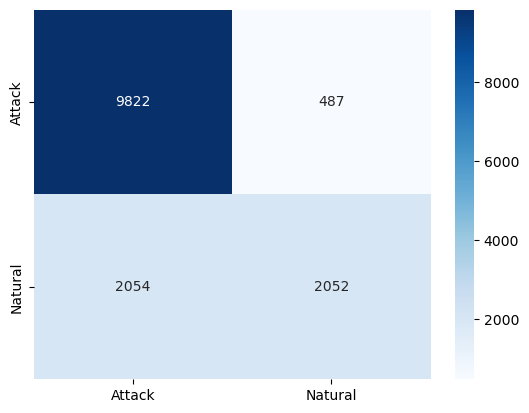

In [22]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=LABELNAMES, yticklabels=LABELNAMES)

In [23]:
# Define the hyperparameter space to search over
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
    'max_depth': np.arange(2, 10),
    'min_child_weight': np.arange(1, 10),
    'gamma': [0, 0.1, 0.5, 1],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1],
    'n_estimators': np.arange(100, 1000, 100),
    'random_state': [42]
}

In [24]:
%%time
# Perform randomized search with cross-validation
#model_xgb_rs = RandomizedSearchCV(model_xgb, param_distributions=param_dist, cv=5, n_iter=50, n_jobs=-1, random_state=42)

#model_xgb_rs.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=True)

#TAKES HOURS!!!!

Wall time: 0 ns


In [25]:
# print the best parameters and score
print(f'Best parameters: {model_xgb_rs.best_params_}')
print(f'Best score: {model_xgb_rs.best_score_:.4f}')

NameError: name 'model_xgb_rs' is not defined

n_iter = 10 ---> 21min

Best parameters: {'subsample': 1.0, 'reg_lambda': 1, 'random_state': 42, 'n_estimators': 700, 'min_child_weight': 7, 'max_depth': 8, 'learning_rate': 0.3, 'gamma': 0.1, 'colsample_bytree': 1.0}
Best score: 0.8767

n_iter = 50 ---> 1h 20min

Best parameters: {'subsample': 0.6, 'reg_lambda': 1, 'random_state': 42, 'n_estimators': 900, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.3, 'gamma': 0.5, 'colsample_bytree': 0.6}
Best score: 0.8905


In [26]:
params_best = {'subsample': 0.6, 'reg_lambda': 1, 'random_state': 42, 'n_estimators': 900, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.3, 'gamma': 0.5, 'colsample_bytree': 0.6}

In [27]:
model_xgb_best = xgb.XGBClassifier(**params_best)

model_xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=900, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [28]:
cm, rp, mets = evaluate_model(model_xgb_best, X_test, y_test, LABEL_MAP, True)

Confusion matrix:
[[9852  457]
 [ 908 3198]]
Classification report:
              precision    recall  f1-score   support

      Attack       0.92      0.96      0.94     10309
     Natural       0.87      0.78      0.82      4106

    accuracy                           0.91     14415
   macro avg       0.90      0.87      0.88     14415
weighted avg       0.90      0.91      0.90     14415



In [29]:
print(mets)

[0.9156133828996282, 0.9556698030846833, 0.7788602045786653]


<AxesSubplot:>

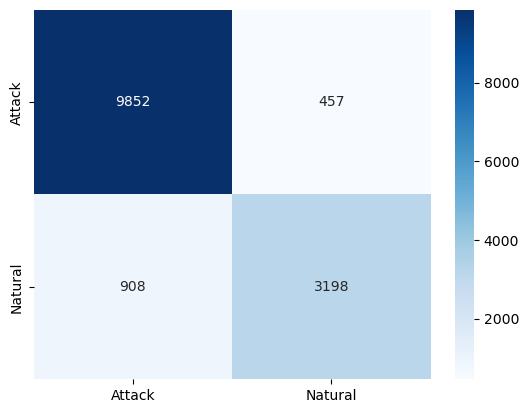

In [30]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=LABELNAMES, yticklabels=LABELNAMES)

Text(0.5, 23.52222222222222, 'Predicted')

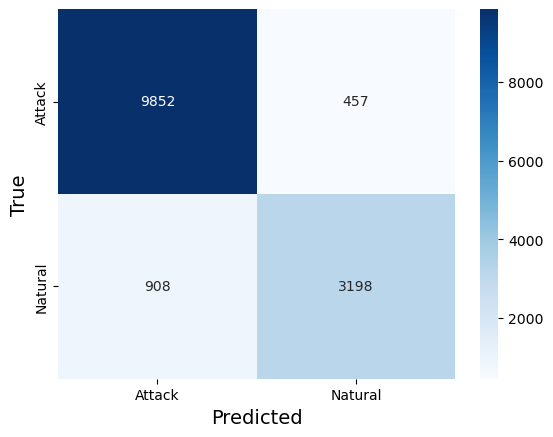

In [31]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=LABELNAMES, yticklabels=LABELNAMES)
# add labels to the left and bottom borders
ax.set_ylabel("True", fontsize=14)
ax.set_xlabel("Predicted", fontsize=14)